In [1]:
import os
import glob
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('ggplot')
from numpy import inf
import math
from sklearn.cluster import KMeans
from scipy.stats import norm, kde, kstest
from scipy.stats import poisson


In [2]:
# Change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [3]:
#Read csv file into a dataframe
df = pd.read_csv(r'CombinedData.csv', engine='python')

In [4]:
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [5]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


#### Creating Pandas Series out of the word col

In [6]:
text = df.word
text.head()

0     fiscal
1       year
2    adopted
3     budget
4     brenda
Name: word, dtype: object

#### Extract all elements from the series

In [7]:
# Join the elements and sperate them by a single space
corpus = ' '.join(word for word in text)

In [8]:
len(corpus)

26796670

In [9]:
corpus[:196] # Let's see the first 196 chars in the series

'fiscal year adopted budget brenda jones county manager sharisse fuller assistant county managerhuman resources director prepared office budget management evaluation michael halford budget director'

#### Tokenizing +  Building bigrams 

In [10]:
# Tokenize
tokens = nltk.word_tokenize(corpus)

# Create bigrams
bgs = nltk.bigrams(tokens)

#### Computing raw frequency of the bigrams

In [11]:
# Compute frequency distribution for all the bigrams in the corpus
bgs_fdist = nltk.FreqDist(bgs)

# Convert nltk freq dist to dictonary
bgs_fdistDic = bgs_fdist.items()

#### Creating a data frame out of the dictionary 

In [12]:
bgs_fdist_df = pd.DataFrame.from_dict(bgs_fdistDic)
bgs_fdist_df.columns = ['bigram','frequency']
bgs_fdist_df.head()

,bigram,frequency
0,"(fiscal, year)",8461
1,"(year, adopted)",4405
2,"(adopted, budget)",7968
3,"(budget, brenda)",1
4,"(brenda, jones)",2


In [13]:
df['bigram'] = bgs_fdist_df['bigram']
df['bigram frequency'] = bgs_fdist_df['frequency']
df.head()

,word,organization,year,bigram,bigram frequency
0,fiscal,Guilford County,FY2013,"(fiscal, year)",8461.0
1,year,Guilford County,FY2013,"(year, adopted)",4405.0
2,adopted,Guilford County,FY2013,"(adopted, budget)",7968.0
3,budget,Guilford County,FY2013,"(budget, brenda)",1.0
4,brenda,Guilford County,FY2013,"(brenda, jones)",2.0


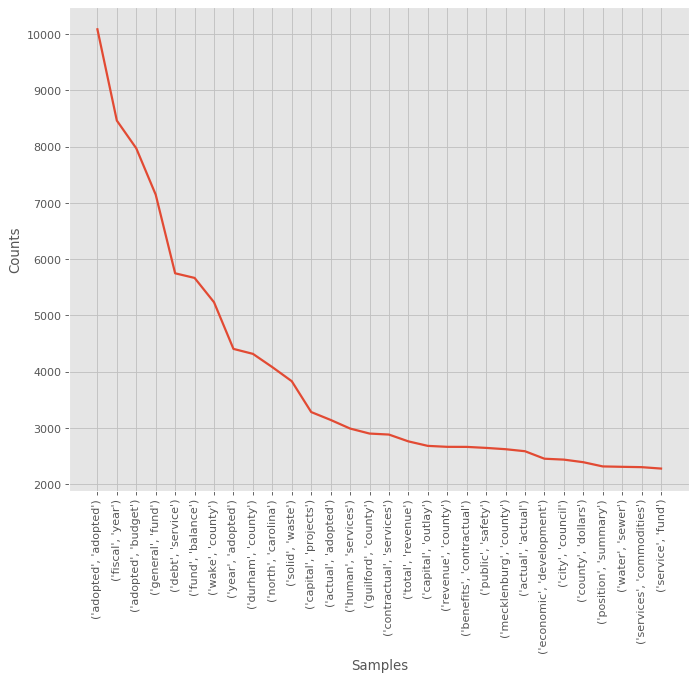

In [14]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
bgs_fdist.plot(30, cumulative=False)

In [15]:
# Create bigrams
tgs = nltk.trigrams(tokens)

In [16]:
# Compute frequency distribution for all the trigrams in the corpus
tgs_fdist = nltk.FreqDist(tgs)

# Convert nltk freq dist to dictonary
tgs_fdistDic = tgs_fdist.items()

In [17]:
tgs_fdist_df = pd.DataFrame.from_dict(tgs_fdistDic)
tgs_fdist_df.columns = ['trigram','frequency']
tgs_fdist_df.head()

,trigram,frequency
0,"(fiscal, year, adopted)",4267
1,"(year, adopted, budget)",4293
2,"(adopted, budget, brenda)",1
3,"(budget, brenda, jones)",1
4,"(brenda, jones, county)",2


In [18]:
df['trigram'] = tgs_fdist_df['trigram']
df['trigram frequency'] = tgs_fdist_df['frequency']
df.head(60)

,word,organization,year,bigram,bigram frequency,trigram,trigram frequency
0,fiscal,Guilford County,FY2013,"(fiscal, year)",8461.0,"(fiscal, year, adopted)",4267.0
1,year,Guilford County,FY2013,"(year, adopted)",4405.0,"(year, adopted, budget)",4293.0
2,adopted,Guilford County,FY2013,"(adopted, budget)",7968.0,"(adopted, budget, brenda)",1.0
3,budget,Guilford County,FY2013,"(budget, brenda)",1.0,"(budget, brenda, jones)",1.0
4,brenda,Guilford County,FY2013,"(brenda, jones)",2.0,"(brenda, jones, county)",2.0
5,jones,Guilford County,FY2013,"(jones, county)",5.0,"(jones, county, manager)",4.0
6,county,Guilford County,FY2013,"(county, manager)",1417.0,"(county, manager, sharisse)",1.0
7,manager,Guilford County,FY2013,"(manager, sharisse)",1.0,"(manager, sharisse, fuller)",1.0
8,sharisse,Guilford County,FY2013,"(sharisse, fuller)",3.0,"(sharisse, fuller, assistant)",2.0
9,fuller,Guilford County,FY2013,"(fuller, assistant)",2.0,"(fuller, assistant, county)",2.0


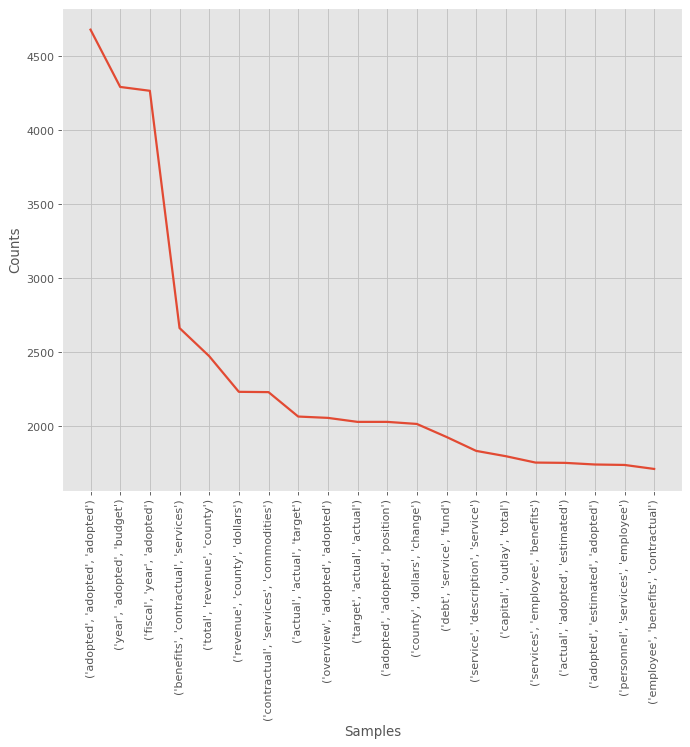

In [19]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
tgs_fdist.plot(20, cumulative=False)

In [20]:
tokens[:10]

['fiscal',
 'year',
 'adopted',
 'budget',
 'brenda',
 'jones',
 'county',
 'manager',
 'sharisse',
 'fuller']

In [21]:
def extractDigits(lst): 
    return [[el] for el in lst] 

In [22]:
listOfLists = extractDigits(tokens)

In [23]:
listOfLists[:20]

[['fiscal'],
 ['year'],
 ['adopted'],
 ['budget'],
 ['brenda'],
 ['jones'],
 ['county'],
 ['manager'],
 ['sharisse'],
 ['fuller'],
 ['assistant'],
 ['county'],
 ['managerhuman'],
 ['resources'],
 ['director'],
 ['prepared'],
 ['office'],
 ['budget'],
 ['management'],
 ['evaluation']]

In [24]:
def extract_sentence(target, tokens):
    if target in tokens:
        sentence = [x[tokens.index(target):5] for x in tokens]
    else:
        sentence = "Error: Target word does not exist in the given list"
    return sentence

In [25]:
sentence = extract_sentence('guilford', tokens)
sentence


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
